In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from numpy import array
from numpy import diag
from numpy import dot
from numpy import zeros
import scipy.sparse as sparse
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix

import datetime as dt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Numpy

In [2]:
m = np.matrix([[7, 0, 5], 
               [9, 2, 5], 
               [4, 3, 1]])
u, s, v = np.linalg.svd(m)

In [4]:
m

matrix([[7, 0, 5],
        [9, 2, 5],
        [4, 3, 1]])

In [3]:
u

matrix([[-0.59570664,  0.54697619,  0.5881757 ],
        [-0.74020814, -0.0895758 , -0.66638434],
        [-0.31181006, -0.83234201,  0.45823712]])

In [4]:
s

array([14.16401966,  3.06137837,  0.09224789])

In [5]:
v

matrix([[-0.85279887, -0.17056221, -0.49360168],
        [-0.10018915, -0.87417408,  0.47516503],
        [-0.512539  ,  0.45467373,  0.72840619]])

np.dot : 내적하여 행렬을 복원함. Reconstruction matrix m

In [5]:
np.dot(u, np.dot(np.diag(s), v))

matrix([[7.00000000e+00, 5.57938353e-16, 5.00000000e+00],
        [9.00000000e+00, 2.00000000e+00, 5.00000000e+00],
        [4.00000000e+00, 3.00000000e+00, 1.00000000e+00]])

## Scipy

In [6]:
from scipy.sparse.linalg import svds
from scipy.sparse import rand
from scipy.sparse import csc_matrix
import scipy.sparse as sparse

In [7]:
A = rand(4, 4, density=0.5, format="csr", random_state=25)
A = A.toarray()

In [8]:
A

array([[0.1619851 , 0.        , 0.        , 0.58544512],
       [0.83637451, 0.36639455, 0.69918624, 0.44703085],
       [0.        , 0.        , 0.        , 0.        ],
       [0.52071879, 0.        , 0.32605113, 0.        ]])

In [9]:
U, s, VT = svds(A,k=2)
print(U)
print('-'*20)
print(s)
print('-'*20)
print(VT)

[[-9.05363921e-01  2.47046211e-01]
 [ 6.65824446e-02  8.85873423e-01]
 [-4.32942930e-16 -9.40256381e-17]
 [ 4.19384012e-01  3.92678555e-01]]
--------------------
[0.54836361 1.38828425]
--------------------
[[ 0.23235226  0.04448772  0.3342566  -0.91230795]
 [ 0.70980771  0.2337988   0.53837951  0.38943375]]


dot(내적으로) 복원

In [10]:
np.dot(U, np.dot(np.diag(s), VT))

array([[ 1.28087398e-01,  5.80993043e-02,  1.87002977e-02,
         5.86496510e-01],
       [ 8.81436336e-01,  2.89160389e-01,  6.74327046e-01,
         4.45633179e-01],
       [-1.47817046e-16, -4.10806011e-17, -1.49632909e-16,
         1.65756698e-16],
       [ 4.40386477e-01,  1.37686348e-01,  3.70367934e-01,
         2.49163985e-03]])

## TruncatedSVD
truncated SVD는 이러한 SVD의 변형입니다. 특이값의  상위 n개만 골라낸 것입니다. 이렇게 하면 기존 행렬 A의 성질을 100% 복원할 수는 없지만, (그 만큼 데이터 정보를 압축) 행렬 A와 거의 근사한 값이 나오게 됩니다. TruncatedSVD는 U, Sigma, Vt 반환 값을 제공하지 않습니다.<br><br>

truncatedSVD, transpose, Correlation Examples

In [11]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import SVD, SVDpp, NMF

In [12]:
data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
df.head()

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [13]:
user_movie_rating = df.pivot_table('rate', index = 'user', columns='item').fillna(0)

In [14]:
user_movie_rating.shape

(943, 1682)

values and T로 배열만들고 전치

In [15]:
movie_user_rating = user_movie_rating.values.T

In [16]:
type(movie_user_rating)

numpy.ndarray

In [17]:
movie_user_rating.shape

(1682, 943)

In [18]:
movie_user_rating

array([[5., 4., 0., ..., 4., 0., 4.],
       [3., 0., 0., ..., 0., 0., 0.],
       [5., 5., 0., ..., 2., 0., 5.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

n_componentsint : default값은 2이며 원하는 차원의 데이터가 출력됩니다. 피쳐값보다 작아야 하는 것이 원칙입니다.<br>
fit_transform : perform dimensionality reduction

In [19]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(movie_user_rating)
matrix.shape

(1682, 12)

In [20]:
corr = np.corrcoef(matrix)
corr.shape

(1682, 1682)

In [34]:
corr

array([[1.        , 0.57108045, 0.80268449, ..., 0.55763354, 0.59440286,
        0.55289023],
       [0.57108045, 1.        , 0.73292312, ..., 0.37506988, 0.43413801,
        0.06891118],
       [0.80268449, 0.73292312, 1.        , ..., 0.5637021 , 0.47324557,
        0.32381496],
       ...,
       [0.55763354, 0.37506988, 0.5637021 , ..., 1.        , 0.74907507,
        0.69652577],
       [0.59440286, 0.43413801, 0.47324557, ..., 0.74907507, 1.        ,
        0.64157989],
       [0.55289023, 0.06891118, 0.32381496, ..., 0.69652577, 0.64157989,
        1.        ]])

In [21]:
corr2 = corr[:200, :200]
corr2.shape

(200, 200)

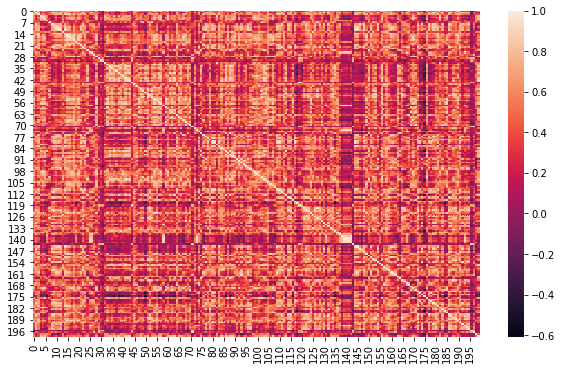

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr2)

.

## KNNWithMeans

KNNBasic : 특정공간내에서 입력과 제일 근접한 k개의 요소를 찾아, 더 많이 일치하는 것으로 분류하는 알고리즘입니다.<br>
KNNWithMeans : KNNBasic과 비슷한 모델이며 각 유저/아이템의 평균 평점을 계산하는 알고리즘입니다.<br>
k (int) Default 40 neighbors를 계산할 최대값 설정.

In [25]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.15)
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [26]:
test_pred = algo.test(testset)

print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

print("User-based Model : Training Set")
train_pred = algo.test(trainset.build_testset())
accuracy.rmse(train_pred)

User-based Model : Test Set
RMSE: 0.9282
User-based Model : Training Set
RMSE: 0.4579


0.4579015372559768

Cross validation, GridSearchCV examples

In [27]:
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)

RMSE, MAE

In [28]:
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))

KNN Basic 	 0.9785 	 0.7726
KNN Means 	 0.9517 	 0.75


GridSearchCV을 사용하여 KNN의 파라미터 수정

In [29]:
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60]}

knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

In [30]:
x = [15, 20, 25, 30, 40, 50, 60]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

GridSearchCV : 알고리즘의 행렬 정확도를 계산해 최적의 파라미터 값을 찾는 모듈입니다.

In [31]:
knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

In [32]:
print(knnmeans_gs.best_score['rmse'])

0.9487150422938168


In [33]:
print(knnmeans_gs.best_params['rmse'])

{'k': 50}
